In [2]:
from matplotlib.pyplot import scatter, plot
import numpy as np
import tensorflow as tf
import os 
import pandas as pd

In [4]:
ROOT = "/Users/shrayesraman/Desktop/temp/newdata/"

In [5]:
files = os.listdir(ROOT)
pfiles = [x for x in files if x[0] == 'p']
pfiles = sorted(pfiles)
cfiles = [x for x in files if x[0] == 'c']

zfiles = []

for p in pfiles:
    for c in cfiles:
        if p[-18:] == c[-18:]:
            zfiles.append((p, c))

In [6]:
zfiles

[('predictions_video_20210820_105702.mp4_.npy',
  'centers_video_20210820_105702.mp4_.npy'),
 ('predictions_video_20210821_105702.mp4_.npy',
  'centers_video_20210821_105702.mp4_.npy'),
 ('predictions_video_20210822_105701.mp4_.npy',
  'centers_video_20210822_105701.mp4_.npy'),
 ('predictions_video_20210823_105700.mp4_.npy',
  'centers_video_20210823_105700.mp4_.npy'),
 ('predictions_video_20210824_105659.mp4_.npy',
  'centers_video_20210824_105659.mp4_.npy'),
 ('predictions_video_20210825_105658.mp4_.npy',
  'centers_video_20210825_105658.mp4_.npy'),
 ('predictions_video_20210826_105657.mp4_.npy',
  'centers_video_20210826_105657.mp4_.npy'),
 ('predictions_video_20210827_105657.mp4_.npy',
  'centers_video_20210827_105657.mp4_.npy'),
 ('predictions_video_20210828_105656.mp4_.npy',
  'centers_video_20210828_105656.mp4_.npy'),
 ('predictions_video_20210829_105655.mp4_.npy',
  'centers_video_20210829_105655.mp4_.npy'),
 ('predictions_video_20210830_105654.mp4_.npy',
  'centers_video_20210

In [7]:
frames = []
for i , f in enumerate(zfiles):
    predicts = np.load(os.path.join(ROOT, f[0]), allow_pickle=True)
    lpredicts = list(predicts)
    l2predicts = [list(x) for x in lpredicts]
    fpredicts = [[x, y.numpy()] for x, y in l2predicts]
    x = [x for x, y in fpredicts]
    y = [float(y) for x, y in fpredicts]
    y_r = (np.array(y, dtype='f4'))
    df_xy = pd.DataFrame({'time_stamp': x,'prediction': y_r})

    predicts = np.load(os.path.join(ROOT, f[1]), allow_pickle=True)
    lpredicts = list(predicts)
    l2predicts = [list(x) for x in lpredicts]
    ts = [x for x, _ in l2predicts]
    xy = [x for _, x in l2predicts]
    x = [float(x) for x, y in xy]
    y = [float(y) for x, y in xy]
    df_centers = pd.DataFrame({'time_stamp': ts, 'x': x, 'y': y})

    result = pd.merge(df_xy, df_centers, how="right", on='time_stamp')    

    result['Day'] = i

    frames.append(result)

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-03-02 13:09:04.473520: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-02 13:09:04.473719: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
df = pd.concat(frames)



In [33]:
df["prediction"].unique()

array([        nan, -0.262628  , -0.23944281, ...,  0.32490495,
        0.23730455,  0.49083528], dtype=float32)

In [9]:
result = pd.merge(df_xy, df_centers, how="right", on='time_stamp')


In [10]:
df["x_diff"] = df['x'].diff()

In [11]:
df["y_diff"] = df['y'].diff()

In [12]:
df.to_hdf("20210819B_WT.h5", key="data")

In [38]:
import math

In [39]:
def distance(x,y):
    return math.sqrt(x**2 + y**2)

In [40]:
result

,time_stamp,prediction,x,y
0,210,NaN,550.0,449.5
1,220,NaN,545.0,415.5
2,230,NaN,529.0,609.5
3,250,NaN,539.0,623.5
4,260,NaN,527.5,626.0
...,...,...,...,...
42041,765220,NaN,555.5,427.0
42042,765310,NaN,224.0,640.5
42043,765330,NaN,305.0,688.0
42044,765340,NaN,285.0,672.0


In [41]:
df["Distance"] = df.apply(lambda y: distance(y.x_diff, y.y_diff), axis=1)

In [42]:
df

,time_stamp,prediction,x,y,Day,x_diff,y_diff,Distance
0,130,NaN,446.5,642.0,0,NaN,NaN,NaN
1,140,NaN,447.5,630.0,0,1.0,-12.0,12.041595
2,150,NaN,449.5,641.0,0,2.0,11.0,11.180340
3,160,NaN,446.5,652.5,0,-3.0,11.5,11.884864
4,170,NaN,444.0,656.5,0,-2.5,4.0,4.716991
...,...,...,...,...,...,...,...,...
42041,765220,NaN,555.5,427.0,73,18.5,-13.0,22.610838
42042,765310,NaN,224.0,640.5,73,-331.5,213.5,394.302549
42043,765330,NaN,305.0,688.0,73,81.0,47.5,93.900213
42044,765340,NaN,285.0,672.0,73,-20.0,-16.0,25.612497


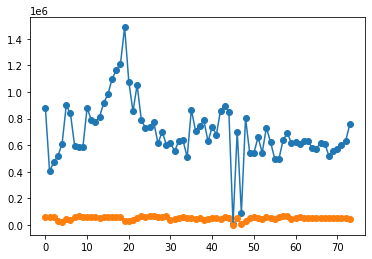

In [43]:
sums = []
samples = []
for i,f in enumerate(zfiles):
    tdf = df.loc[df["Day"] == i]
    sums.append(tdf['Distance'].sum())
    samples.append(sum(df["Day"] == i))

scatter(range(len(sums)),sums)
plot(sums)
scatter(range(len(samples)),samples)
plot(samples)

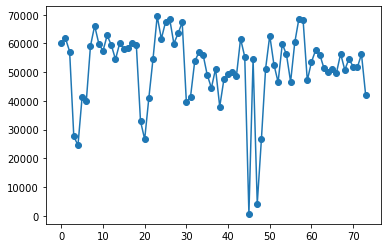

In [44]:
scatter(range(len(samples)),samples)
plot(samples)

In [45]:
print(sums)

[877629.1108624374, 403099.5071484632, 474523.8938326265, 519346.9338142258, 612396.0294509908, 899197.4846744518, 839021.8962753721, 596871.6644974648, 589848.6014373827, 590048.6633119873, 880726.9883178035, 790505.9560518329, 776297.408356527, 814210.8140153716, 920756.597666457, 982688.6704965646, 1101265.8958502351, 1163083.8348216792, 1212137.2736043676, 1487341.1696156645, 1078583.2425308446, 854609.0252777055, 1053848.141547668, 789939.9853851019, 730461.3005559494, 740553.4046905492, 771913.7815953455, 613582.6428249201, 701439.6152244132, 604631.4126503969, 616373.1430523403, 555214.2438410127, 634816.3493444416, 636372.144305361, 509632.0234915476, 867713.7901466087, 709590.874957383, 743759.5722731373, 787136.6638159795, 628386.2914228538, 737294.9270928276, 679977.4050114426, 860391.8731250284, 896257.505472096, 853405.5408285237, 9566.426820032191, 703184.5963792253, 92227.22183188895, 805463.9536305649, 538679.8467083414, 542082.9405943308, 659756.4163011326, 544884.3344

In [46]:
ft = np.fft.fft(sums)

/Users/shrayesraman/miniforge3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


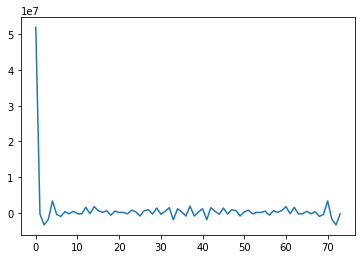

In [47]:
plot(ft)
